<a href="https://colab.research.google.com/github/AsherV77/Dissertation/blob/main/RandomTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No NaN values found in the DataFrame
Accuracy: 0.9166666666666666
Confusion Matrix with Best Model:
[[27  2  0  0]
 [ 2 16  0  0]
 [ 0  1 20  2]
 [ 0  0  1 25]]


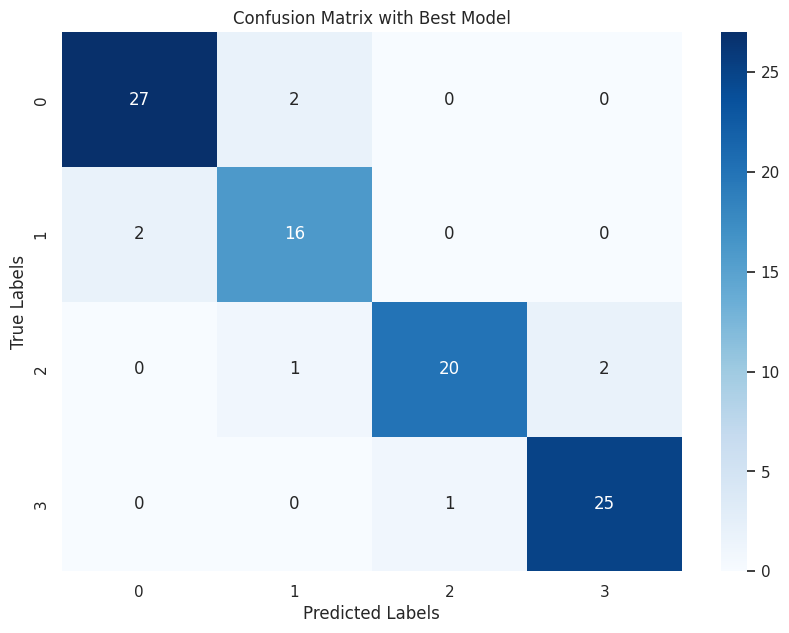

In [ ]:
# Machine Learning models developed for my dissertation
# Here is all the different iterations of Random Forest models I used, testing with different data splitting, tuning and post processing steps
# to get the optimal accuracy and runtime, aiming for a model capable of real-time and accurate analysis

#Code Version 0
#80/20 Training split

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Aggregate data for surfaces (120 each).csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Check for NaN values in the DataFrame
if df.isnull().values.any():
    print('NaN values found in the DataFrame:')
    # Display the count of NaN values per column
    print(df.isnull().sum())
else:
    print('No NaN values found in the DataFrame')

# List of features
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']

# Select features and target variable
X = df[features]
y = df['Road_Surface_Type']

# Convert y to a numeric type if it's not already
y = pd.to_numeric(y, errors='coerce')

# Handle NaN values in the features with an imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix with Best Model:")
print(cm)

# Plot the confusion matrix
sns.set()  # Set Seaborn style for the plot
plt.figure(figsize=(10, 7))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Create the heatmap
plt.title('Confusion Matrix with Best Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


No NaN values found in the DataFrame
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best score: 0.9583732057416269
Accuracy with Best Model: 0.9166666666666666
Confusion Matrix with Best Model:
[[27  2  0  0]
 [ 2 16  0  0]
 [ 0  1 20  2]
 [ 0  0  1 25]]


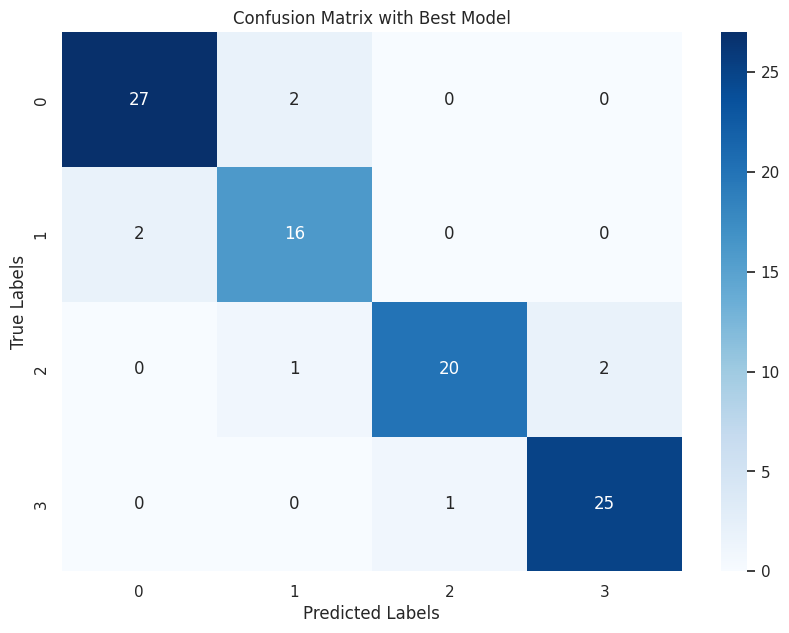

In [ ]:
#Random Forest Classifier
#80/20 Training split
#Hyperparameter tuning

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Aggregate data for surfaces (120 each).csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Check for NaN values in the DataFrame
if df.isnull().values.any():
    print('NaN values found in the DataFrame:')
    # Display the count of NaN values per column
    print(df.isnull().sum())
else:
    print('No NaN values found in the DataFrame')

# List of features
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']

# Select features and target variable
X = df[features]
y = df['Road_Surface_Type']

# Convert y to a numeric type if it's not already
y = pd.to_numeric(y, errors='coerce')

# Handle NaN values in the features with an imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train the Random Forest model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Model: {accuracy}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix with Best Model:")
print(cm)

# Plot the confusion matrix
sns.set()  # Set Seaborn style for the plot
plt.figure(figsize=(10, 7))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Create the heatmap
plt.title('Confusion Matrix with Best Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


No NaN values found in the DataFrame
Accuracy with Best Model: 0.9166666666666666


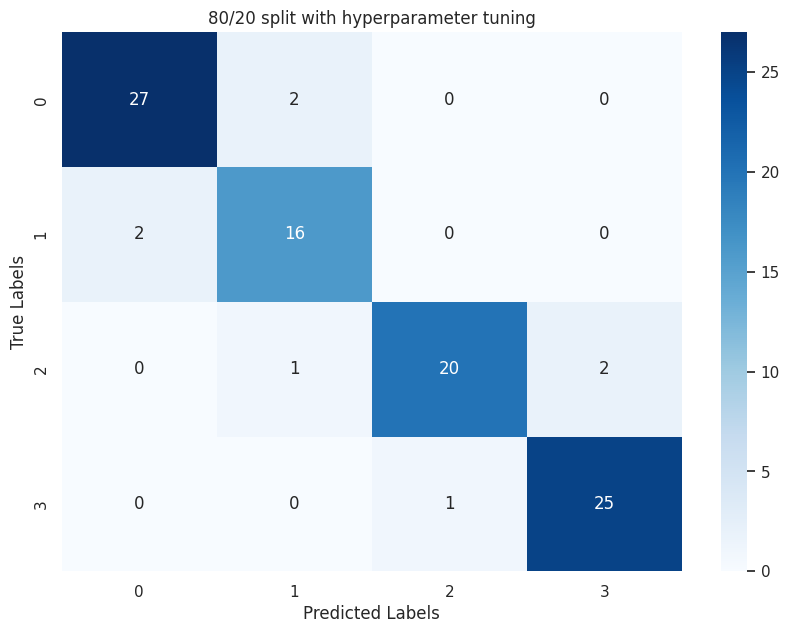

In [ ]:
#Code Version 0
#80/20 Training split
#Hyperparameter tuning
#Best parameters - No grid search

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Aggregate data for surfaces (120 each).csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Check for NaN values in the DataFrame
if df.isnull().values.any():
    print('NaN values found in the DataFrame:')
    # Display the count of NaN values per column
    print(df.isnull().sum())
else:
    print('No NaN values found in the DataFrame')

# List of features
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']

# Select features and target variable
X = df[features]
y = df['Road_Surface_Type']

# Convert y to a numeric type if it's not already
y = pd.to_numeric(y, errors='coerce')

# Handle NaN values in the features with an imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train the Random Forest model with the best parameters
best_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    bootstrap=False,
    random_state=42
)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Model: {accuracy}")

# Plot the confusion matrix
sns.set()  # Set Seaborn style for the plot
plt.figure(figsize=(10, 7))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Create the heatmap
plt.title('80/20 split with hyperparameter tuning')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


No NaN values found in the DataFrame
Accuracy after post-processing: 0.46875
Confusion Matrix after post-processing:
[[10  6  9  4]
 [ 3 12  2  1]
 [ 1  4 15  3]
 [ 6  6  6  8]]


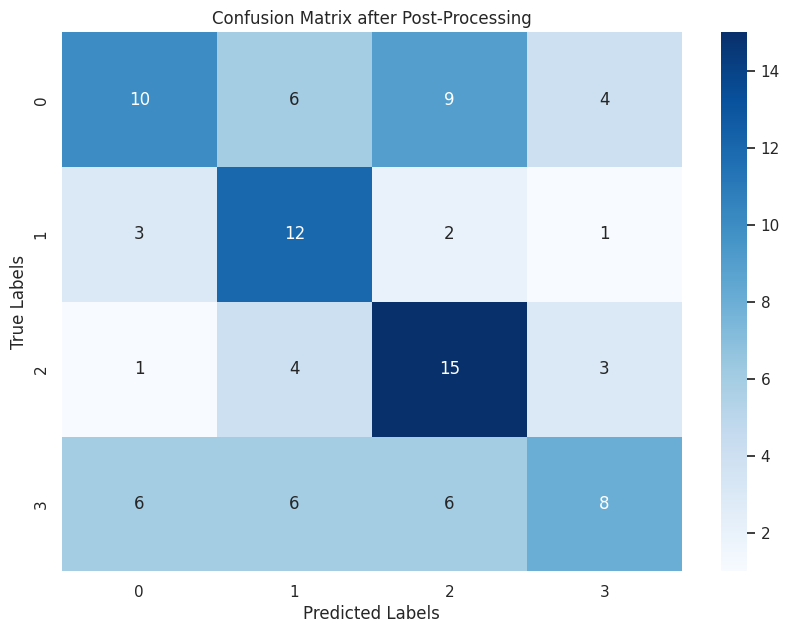

In [ ]:
#Code Version 0
#80/20 Training split
#Post processing

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from scipy.signal import medfilt  # Import the median filter function
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Aggregate data for surfaces (120 each).csv'
df = pd.read_csv(file_path)

# Check for NaN values in the DataFrame
if df.isnull().values.any():
    print('NaN values found in the DataFrame:')
    # Display the count of NaN values per column
    print(df.isnull().sum())
else:
    print('No NaN values found in the DataFrame')

# List of features
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']

# Select features and target variable
X = df[features]
y = df['Road_Surface_Type']

# Convert y to a numeric type if it's not already
y = pd.to_numeric(y, errors='coerce')

# Handle NaN values in the features with an imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Apply a median filter to smooth the predictions
y_pred_smoothed = medfilt(y_pred, kernel_size=3)

# Calculate and print the accuracy after post-processing
accuracy_smoothed = accuracy_score(y_test, y_pred_smoothed)
print(f"Accuracy after post-processing: {accuracy_smoothed}")

# Calculate the confusion matrix after post-processing
cm_smoothed = confusion_matrix(y_test, y_pred_smoothed)
print("Confusion Matrix after post-processing:")
print(cm_smoothed)

# Plot the confusion matrix after post-processing
sns.set()  # Set Seaborn style for the plot
plt.figure(figsize=(10, 7))  # Set the figure size
sns.heatmap(cm_smoothed, annot=True, fmt='d', cmap='Blues')  # Create the heatmap
plt.title('Confusion Matrix after Post-Processing')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


No NaN values found in the DataFrame
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validated score: 0.9583732057416269
Accuracy after post-processing: 0.4583333333333333
Confusion Matrix after post-processing:
[[ 9  7  9  4]
 [ 3 12  2  1]
 [ 1  4 15  3]
 [ 6  6  6  8]]


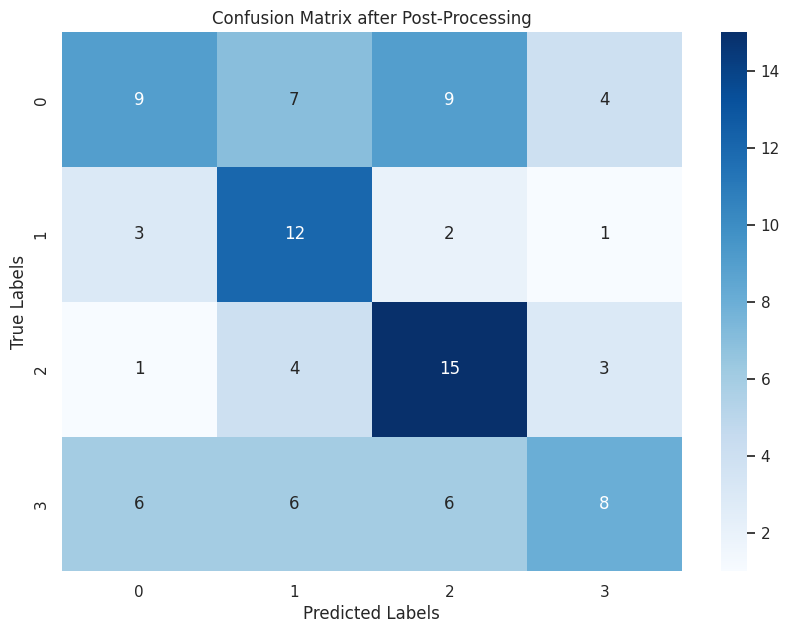

In [ ]:
#Code Version 0
#80/20 Training split
#Hyperparameter tuning & Post-Processing

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from scipy.signal import medfilt  # Import the median filter function
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Aggregate data for surfaces (120 each).csv'
df = pd.read_csv(file_path)

# Check for NaN values in the DataFrame
if df.isnull().values.any():
    print('NaN values found in the DataFrame:')
    print(df.isnull().sum())
else:
    print('No NaN values found in the DataFrame')

# List of features
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']

# Select features and target variable
X = df[features]
y = df['Road_Surface_Type']

# Convert y to a numeric type if it's not already
y = pd.to_numeric(y, errors='coerce')

# Handle NaN values in the features with an imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Define a parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize a GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

# Train the Random Forest model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set with the best model
y_pred = best_model.predict(X_test)

# Apply a median filter to smooth the predictions
y_pred_smoothed = medfilt(y_pred, kernel_size=3)

# Calculate and print the accuracy after post-processing
accuracy_smoothed = accuracy_score(y_test, y_pred_smoothed)
print(f"Accuracy after post-processing: {accuracy_smoothed}")

# Calculate the confusion matrix after post-processing
cm_smoothed = confusion_matrix(y_test, y_pred_smoothed)
print("Confusion Matrix after post-processing:")
print(cm_smoothed)

# Plot the confusion matrix after post-processing
plt.figure(figsize=(10, 7))
sns.heatmap(cm_smoothed, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix after Post-Processing')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


No NaN values found in the DataFrame
Accuracy: 0.9166666666666666
Confusion Matrix:
[[27  2  0  0]
 [ 2 16  0  0]
 [ 0  1 20  2]
 [ 0  0  1 25]]


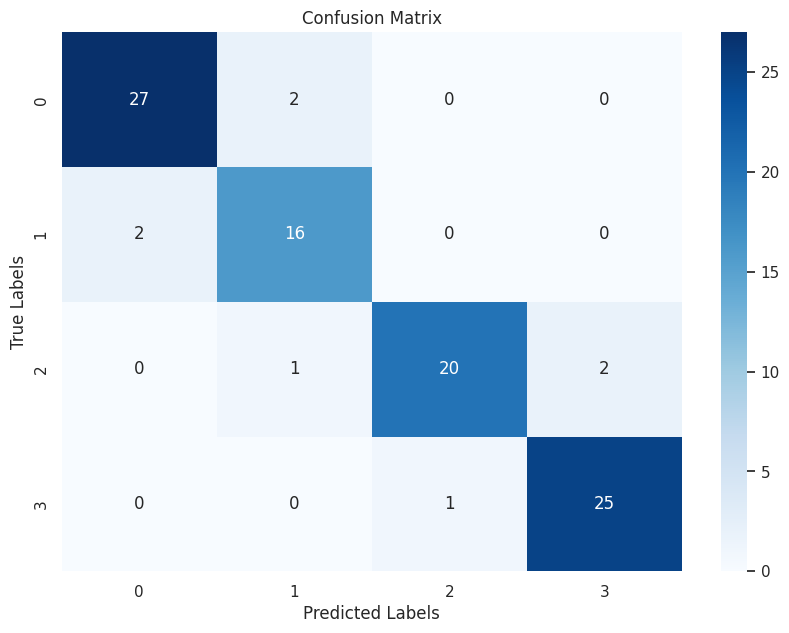

In [ ]:
#CODE VERSION 2
#This is for the updated dataset for 6mph, I don't think it has any cross validation
#No cross validation, just a normal 80/20 split
#No hyperparameter tuning


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Aggregate data for surfaces (120 each).csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Check for NaN values in the DataFrame
if df.isnull().values.any():
    print('NaN values found in the DataFrame:')
    # Display the count of NaN values per column
    print(df.isnull().sum())
else:
    print('No NaN values found in the DataFrame')

# List of features
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']

# Select features and target variable
X = df[features]
y = df['Road_Surface_Type']

# Convert y to a numeric type if it's not already
y = pd.to_numeric(y, errors='coerce')

# Handle NaN values in the features with an imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
sns.set()  # Set Seaborn style for the plot
plt.figure(figsize=(10, 7))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Create the heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


No NaN values found in the DataFrame
Mean Accuracy: 0.9354166666666667


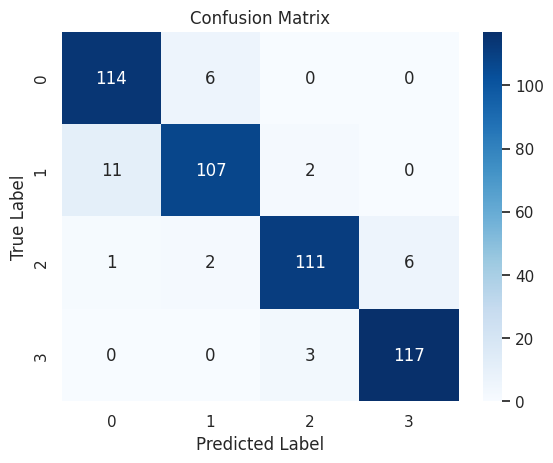

In [ ]:
#CODE VERSION 3
#10 Cross Validation
#No hyperparameter tuning
#No post processing

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Aggregate data for surfaces (120 each).csv'

df = pd.read_csv(file_path)

# Check for and handle NaN values
if df.isnull().values.any():
    print('NaN values found in the DataFrame:')
    print(df.isnull().sum())
else:
    print('No NaN values found in the DataFrame')

# Define features and target
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features]
y = df['Road_Surface_Type']

# Coerce non-numeric values to NaN and then to the mean of the column
y = pd.to_numeric(y, errors='coerce')

# Impute missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation and get the predictions
predictions = cross_val_predict(model, X_imputed, y, cv=10)

# Calculate and print the mean accuracy
accuracy = np.mean(predictions == y)
print(f"Mean Accuracy: {accuracy}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y, predictions)

# Visualize the confusion matrix with Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


No NaN values found in the DataFrame
Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Mean Accuracy with best model: 0.94375


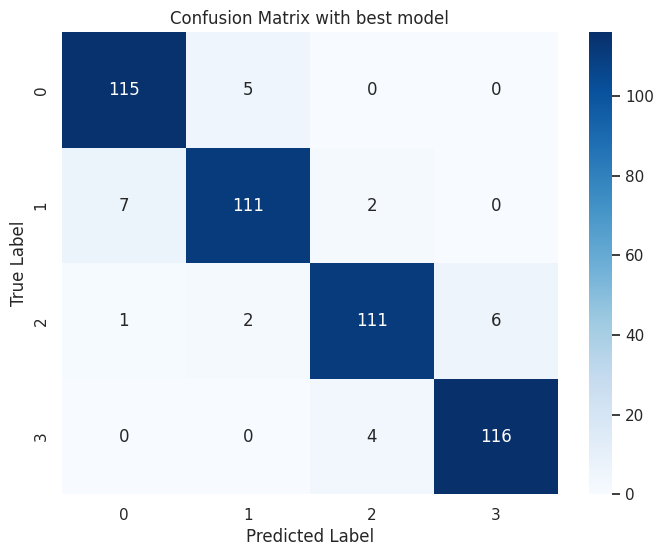

In [ ]:
#10 fold cross validation
#Hyperparameter tuning

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Aggregate data for surfaces (120 each).csv'
df = pd.read_csv(file_path)

# Check for and handle NaN values
if df.isnull().values.any():
    print('NaN values found in the DataFrame:')
    print(df.isnull().sum())
else:
    print('No NaN values found in the DataFrame')

# Define features and target
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features]
y = df['Road_Surface_Type']

# Coerce non-numeric values to NaN and then fill them with the mean
y = pd.to_numeric(y, errors='coerce')

# Impute missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with the RandomForestClassifier and the defined parameter grid
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=10, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_imputed, y)

# Get the best estimator
best_model = grid_search.best_estimator_

# Perform cross-validation and get the predictions
predictions = cross_val_predict(best_model, X_imputed, y, cv=10)

# Calculate and print the accuracy
accuracy = accuracy_score(y, predictions)
print(f"Mean Accuracy with best model: {accuracy}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y, predictions)

# Visualize the confusion matrix with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix with best model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


No NaN values found in the DataFrame
Mean Accuracy before post-processing: 0.9458333333333333
Mean Accuracy after post-processing: 0.9916666666666667


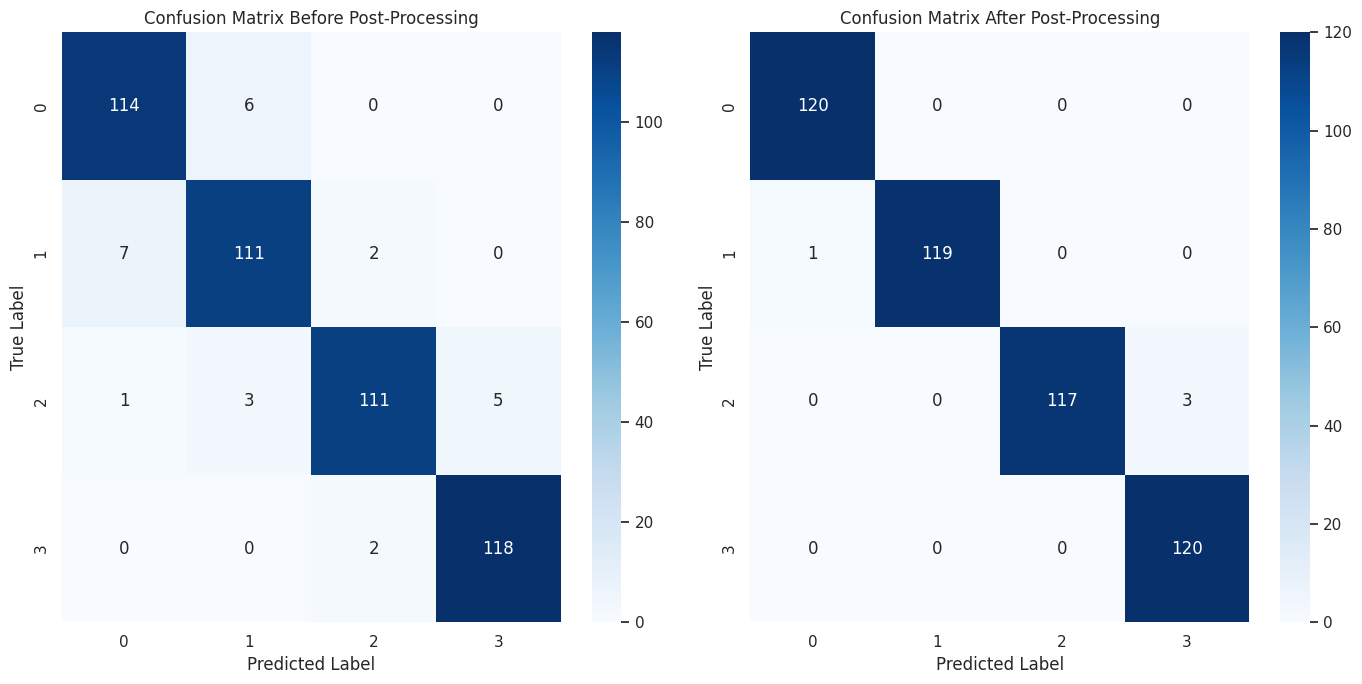

In [ ]:
#CODE VERSION 4
#10 fold cross validation
#Contains post processing
#No hyperparameter tuning


import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.signal import medfilt
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Aggregate data for surfaces (120 each).csv'
df = pd.read_csv(file_path)

# Handle NaN values
if df.isnull().values.any():
    print('NaN values found in the DataFrame:')
    print(df.isnull().sum())
else:
    print('No NaN values found in the DataFrame')

# Features and target
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features]
y = df['Road_Surface_Type']
y = pd.to_numeric(y, errors='coerce')

# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 10-fold cross-validation and get predictions
kf = KFold(n_splits=10, shuffle=True, random_state=42)
predictions = cross_val_predict(model, X_imputed, y, cv=kf)

# Post-processing with a median filter to smooth predictions
smoothed_predictions = medfilt(predictions, kernel_size=5)

# Calculate and print the mean accuracy before post-processing
mean_accuracy_before = np.mean(predictions == y)
print(f"Mean Accuracy before post-processing: {mean_accuracy_before}")

# Calculate and print the mean accuracy after post-processing
mean_accuracy_after = accuracy_score(y, smoothed_predictions)
print(f"Mean Accuracy after post-processing: {mean_accuracy_after}")

# Confusion matrix before post-processing
conf_matrix_before = confusion_matrix(y, predictions)

# Confusion matrix after post-processing
conf_matrix_after = confusion_matrix(y, smoothed_predictions)

# Visualize the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
sns.heatmap(conf_matrix_before, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix Before Post-Processing')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

sns.heatmap(conf_matrix_after, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix After Post-Processing')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


No NaN values found in the DataFrame
Mean Accuracy before post-processing: 0.9458333333333333
Mean Accuracy after post-processing: 0.9916666666666667


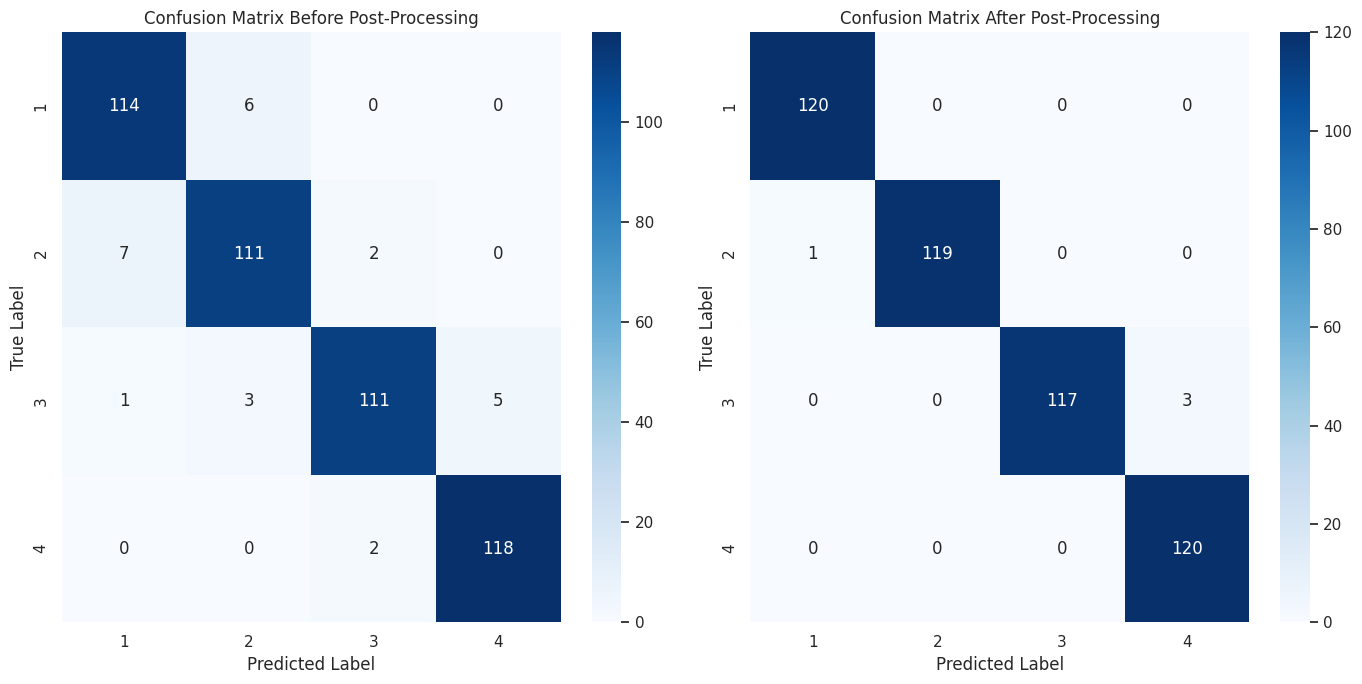

In [ ]:
#CODE VERSION 5
#Contains post-processing
#No hyperparameter tuning
#Contains 5 fold cross validation instead of 10 fold cross validation

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.signal import medfilt
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Aggregate data for surfaces (120 each).csv'
df = pd.read_csv(file_path)

# Handle NaN values
if df.isnull().values.any():
    print('NaN values found in the DataFrame:')
    print(df.isnull().sum())
else:
    print('No NaN values found in the DataFrame')

# Features and target
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features]
y = df['Road_Surface_Type']
y = pd.to_numeric(y, errors='coerce')

# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation and get predictions
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predictions = cross_val_predict(model, X_imputed, y, cv=kf)

# Adjust the predictions and true labels for confusion matrix
y_adjusted = y - 1
predictions_adjusted = predictions - 1

# Post-processing with a median filter to smooth predictions
smoothed_predictions = medfilt(predictions, kernel_size=5)
smoothed_predictions_adjusted = smoothed_predictions - 1

# Calculate and print the mean accuracy before post-processing
mean_accuracy_before = np.mean(predictions_adjusted == y_adjusted)
print(f"Mean Accuracy before post-processing: {mean_accuracy_before}")

# Calculate and print the mean accuracy after post-processing
mean_accuracy_after = accuracy_score(y_adjusted, smoothed_predictions_adjusted)
print(f"Mean Accuracy after post-processing: {mean_accuracy_after}")

# Define new labels for the axes
new_labels = [1, 2, 3, 4]

# Confusion matrix before post-processing
conf_matrix_before = confusion_matrix(y_adjusted, predictions_adjusted)

# Confusion matrix after post-processing
conf_matrix_after = confusion_matrix(y_adjusted, smoothed_predictions_adjusted)

# Visualize the confusion matrices with the corrected labels
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

sns.heatmap(conf_matrix_before, annot=True, fmt='d', cmap='Blues', ax=ax[0],
            xticklabels=new_labels, yticklabels=new_labels)
ax[0].set_title('Confusion Matrix Before Post-Processing')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

sns.heatmap(conf_matrix_after, annot=True, fmt='d', cmap='Blues', ax=ax[1],
            xticklabels=new_labels, yticklabels=new_labels)
ax[1].set_title('Confusion Matrix After Post-Processing')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


No NaN values found in the DataFrame
Mean Accuracy before post-processing: 0.9458333333333333
Mean Accuracy after post-processing: 0.9916666666666667


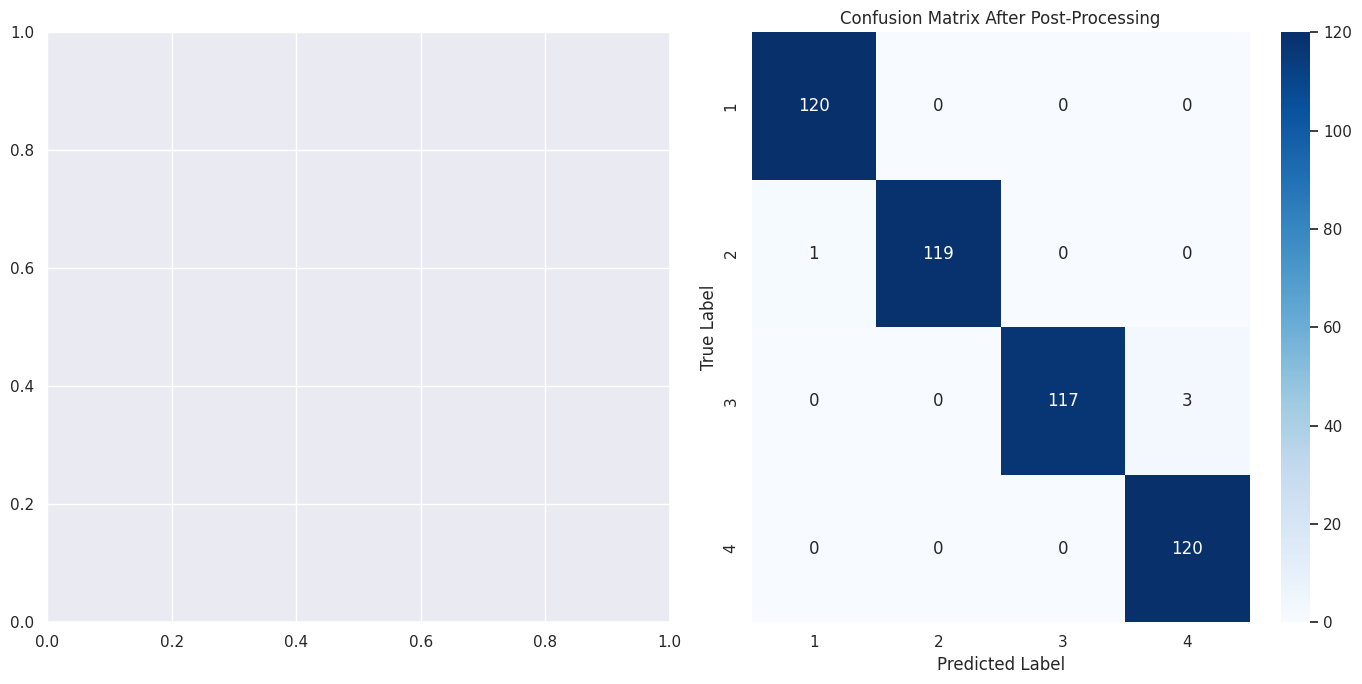

In [ ]:
#CODE VERSION 5
#Contains post-processing
#No hyperparameter tuning
#Contains 5 fold cross validation instead of 10 fold cross validation
#ONLY post processing

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.signal import medfilt
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Aggregate data for surfaces (120 each).csv'
df = pd.read_csv(file_path)

# Handle NaN values
if df.isnull().values.any():
    print('NaN values found in the DataFrame:')
    print(df.isnull().sum())
else:
    print('No NaN values found in the DataFrame')

# Features and target
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features]
y = df['Road_Surface_Type']
y = pd.to_numeric(y, errors='coerce')

# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation and get predictions
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predictions = cross_val_predict(model, X_imputed, y, cv=kf)

# Adjust the predictions and true labels for confusion matrix
y_adjusted = y - 1
predictions_adjusted = predictions - 1

# Post-processing with a median filter to smooth predictions
smoothed_predictions = medfilt(predictions, kernel_size=5)
smoothed_predictions_adjusted = smoothed_predictions - 1

# Calculate and print the mean accuracy before post-processing
mean_accuracy_before = np.mean(predictions_adjusted == y_adjusted)
print(f"Mean Accuracy before post-processing: {mean_accuracy_before}")

# Calculate and print the mean accuracy after post-processing
mean_accuracy_after = accuracy_score(y_adjusted, smoothed_predictions_adjusted)
print(f"Mean Accuracy after post-processing: {mean_accuracy_after}")

# Define new labels for the axes
new_labels = [1, 2, 3, 4]

# Confusion matrix after post-processing
conf_matrix_after = confusion_matrix(y_adjusted, smoothed_predictions_adjusted)

# Visualize the confusion matrices with the corrected labels
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

sns.heatmap(conf_matrix_after, annot=True, fmt='d', cmap='Blues', ax=ax[1],
            xticklabels=new_labels, yticklabels=new_labels)
ax[1].set_title('Confusion Matrix After Post-Processing')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

No NaN values found in the DataFrame
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9416666666666668
Mean Accuracy before post-processing: 0.94375
Mean Accuracy after post-processing: 0.9916666666666667


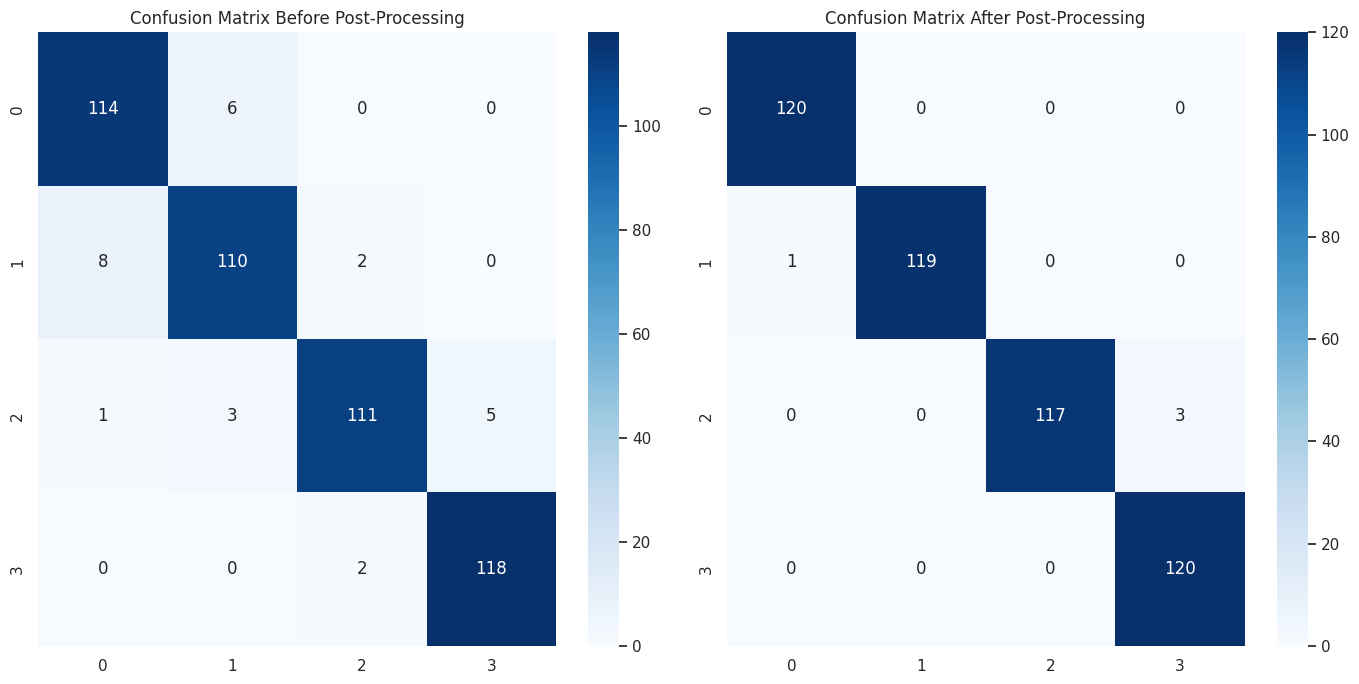

In [ ]:
#5 fold Cross Validation
#Post-processing
#Hyperparameter tuning

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.signal import medfilt
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Aggregate data for surfaces (120 each).csv'
df = pd.read_csv(file_path)

# Handle NaN values
if df.isnull().values.any():
    print('NaN values found in the DataFrame:')
    print(df.isnull().sum())
else:
    print('No NaN values found in the DataFrame')

# Features and target
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features]
y = pd.to_numeric(df['Road_Surface_Type'], errors='coerce')

# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_imputed, y)

# Print the best parameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Perform 5-fold cross-validation with the best model and get predictions
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predictions = cross_val_predict(best_model, X_imputed, y, cv=kf)

# Post-processing with a median filter to smooth predictions
smoothed_predictions = medfilt(predictions, kernel_size=5)

# Calculate and print the accuracy before and after post-processing
accuracy_before = accuracy_score(y, predictions)
accuracy_after = accuracy_score(y, smoothed_predictions)
print(f"Mean Accuracy before post-processing: {accuracy_before}")
print(f"Mean Accuracy after post-processing: {accuracy_after}")

# Confusion matrices
conf_matrix_before = confusion_matrix(y, predictions)
conf_matrix_after = confusion_matrix(y, smoothed_predictions)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
sns.heatmap(conf_matrix_before, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix Before Post-Processing')
sns.heatmap(conf_matrix_after, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix After Post-Processing')
plt.tight_layout()
plt.show()





No NaN values found in the DataFrame
Mean Accuracy: 0.9458333333333333


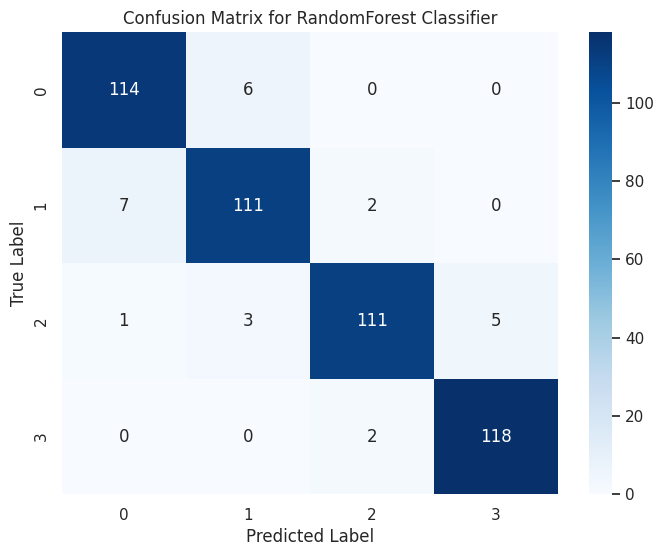

In [ ]:
#5 Fold cross validation

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Aggregate data for surfaces (120 each).csv'
df = pd.read_csv(file_path)

# Handle NaN values
if df.isnull().values.any():
    print('NaN values found in the DataFrame:')
    print(df.isnull().sum())
else:
    print('No NaN values found in the DataFrame')

# Features and target
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features]
y = pd.to_numeric(df['Road_Surface_Type'], errors='coerce')

# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Define and train the model using default parameters
model = RandomForestClassifier(random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predictions = cross_val_predict(model, X_imputed, y, cv=kf)

# Calculate and print the accuracy
accuracy = accuracy_score(y, predictions)
print(f"Mean Accuracy: {accuracy}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y, predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RandomForest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


No NaN values found in the DataFrame
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9416666666666668
Mean Accuracy: 0.94375


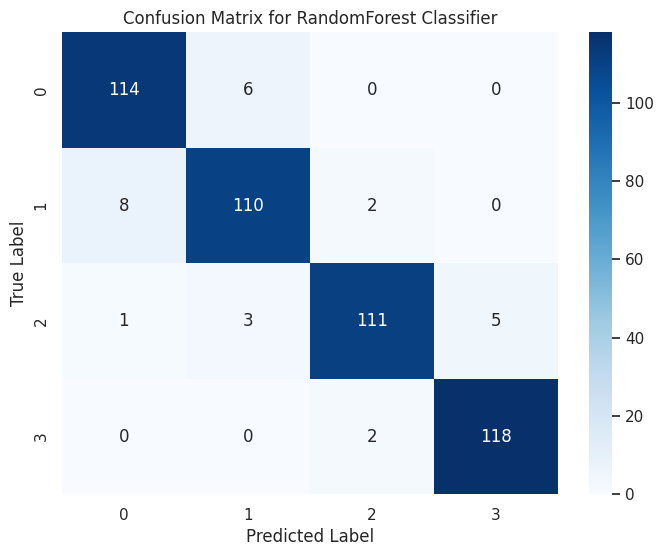

In [ ]:
#5 Fold Cross Validation
#Hyperparameter tuning
#Random Forest Classifier

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Aggregate data for surfaces (120 each).csv'
df = pd.read_csv(file_path)

# Handle NaN values
if df.isnull().values.any():
    print('NaN values found in the DataFrame:')
    print(df.isnull().sum())
else:
    print('No NaN values found in the DataFrame')

# Features and target
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features]
y = pd.to_numeric(df['Road_Surface_Type'], errors='coerce')

# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_imputed, y)

# Print the best parameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Perform 5-fold cross-validation with the best model and get predictions
kf = KFold(n_splits=5, shuffle=True, random_state=42)
predictions = cross_val_predict(best_model, X_imputed, y, cv=kf)

# Calculate and print the accuracy
accuracy = accuracy_score(y, predictions)
print(f"Mean Accuracy: {accuracy}")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y, predictions)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RandomForest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


No NaN values found in the DataFrame
Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Best hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Mean Accuracy before post-processing: 0.9479166666666666
Mean Accuracy after post-processing: 0.9916666666666667


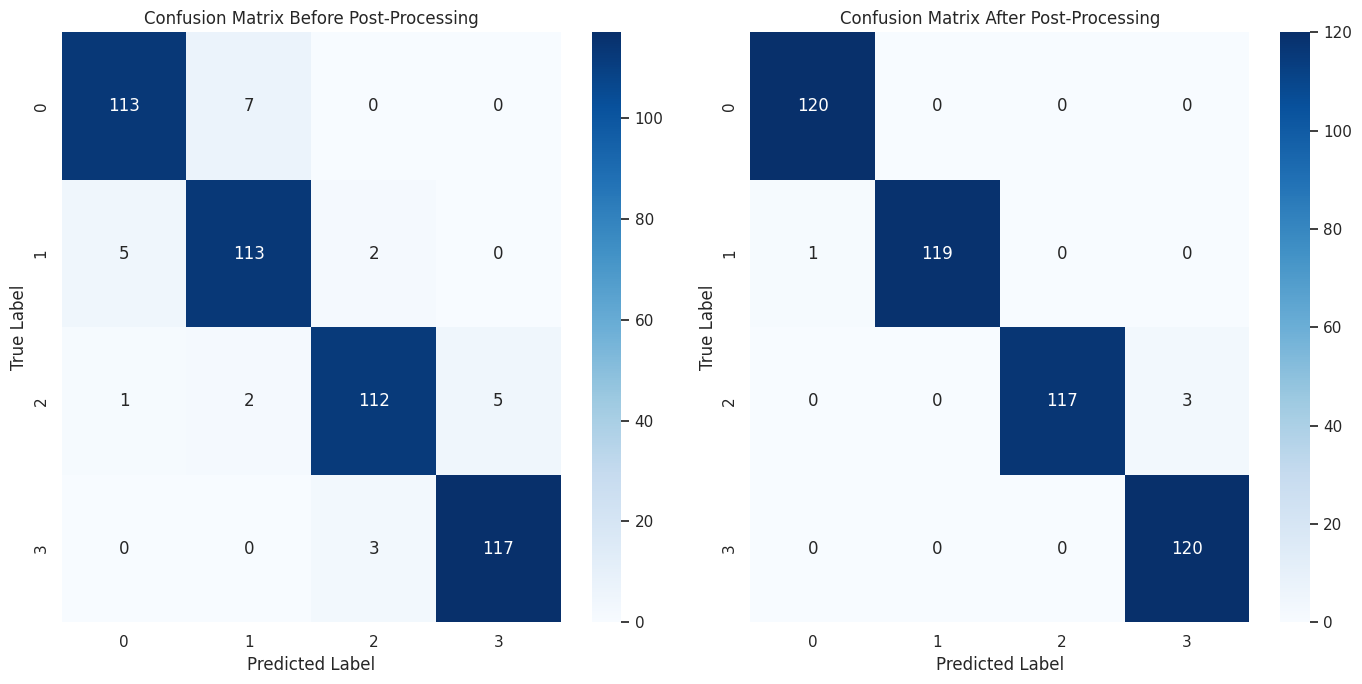

In [ ]:
#Random Forest Classifier
#CODE VERSION 6
#Contains post processing
#Contains 10 fold cross validation
#Contains hyperparameter tuning

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.signal import medfilt
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Aggregate data for surfaces (120 each).csv'
df = pd.read_csv(file_path)

# Handle NaN values
if df.isnull().values.any():
    print('NaN values found in the DataFrame:')
    print(df.isnull().sum())
else:
    print('No NaN values found in the DataFrame')

# Features and target
features = ['RMS', 'Min', 'Max', 'Average', '20th Percentile', '50th Percentile',
            '80th percentile', 'Q1', 'Q3', 'IQR', 'Standard Deviation', 'Skew', 'Kurtosis']
X = df[features]
y = df['Road_Surface_Type']
y = pd.to_numeric(y, errors='coerce')

# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model for hyperparameter tuning
model = RandomForestClassifier(random_state=42)

# Instantiate the grid search model with 10-fold CV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_imputed, y)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best hyperparameters:", best_params)

# Perform 10-fold cross-validation and get predictions with the best model
kf = KFold(n_splits=10, shuffle=True, random_state=42)
predictions = cross_val_predict(best_model, X_imputed, y, cv=kf)

# Post-processing with a median filter to smooth predictions
smoothed_predictions = medfilt(predictions, kernel_size=5)

# Calculate and print the mean accuracy before post-processing
mean_accuracy_before = np.mean(predictions == y)
print(f"Mean Accuracy before post-processing: {mean_accuracy_before}")

# Calculate and print the mean accuracy after post-processing
mean_accuracy_after = accuracy_score(y, smoothed_predictions)
print(f"Mean Accuracy after post-processing: {mean_accuracy_after}")

# Confusion matrix before post-processing
conf_matrix_before = confusion_matrix(y, predictions)

# Confusion matrix after post-processing
conf_matrix_after = confusion_matrix(y, smoothed_predictions)

# Visualize the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
sns.heatmap(conf_matrix_before, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix Before Post-Processing')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

sns.heatmap(conf_matrix_after, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix After Post-Processing')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

